In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import predictor

np.random.seed(5981)

plt.rcParams.update({
    'font.family': 'serif',
    'mathtext.fontset': 'dejavusans',
    'font.serif': ['simsun', 'AR PL UMing CN'],
    'axes.unicode_minus': False,
})

In [144]:
prefix = r'D:\git\zhongguoyuyan\csv'
location = pd.read_csv(os.path.join(prefix, 'dialect', 'location.csv'), index_col=0)
char = pd.read_csv(os.path.join(prefix, 'words.csv'), index_col=0)

sample = location.sample(100)
# sample = location[location['province'].fillna('').str.contains('北京')]
display(sample)

data = []
for id in sample.index:
    d = pd.read_csv(os.path.join(prefix, 'dialect', id + 'mb01dz.csv'), dtype=str)
    d['oid'] = id
    data.append(d)
    
data = pd.concat(data, ignore_index=True).fillna('').sample(50000)

,longitude,latitude,insertDate,uploader,firstLevelid,sheetName,filepath,province,city,country,...,population,nation,minorityInfo,dialectInfo,operaInfo,source,degree,area,slice,slices
06K06,115.508333,34.800000,NaN,NaN,06K06,NaN,山东/曹县需交文件电子版/模板表/其他/概况.xls,山东,菏泽市,曹县,...,170.8万（2017年）,少数民族有回、蒙古、藏、维吾尔、苗、彝、壮、布衣、朝鲜、满、侗、瑶、白、土家、哈尼、傣、佤、...,（无）,本县汉语方言大致分为三类，第一类以旧县城为中心，包括城关以东一些乡镇，如：青堌集，大集、孙老...,有。当地常见地方戏为：豫剧、河南坠子、四平调、两夹弦。,yubao,common,官话,中原官话,兖菏片
26J40,109.666667,28.575000,NaN,NaN,26J40,NaN,湖南/古丈需交文件电子版/模板表/其他/概况.xls,湖南,湘西土家族苗族自治州,古丈,...,14.37万（2018）,汉族1.77万；苗族6.7万；土家族5.9万。有文献记载县内有章民（即仡佬族）居住，但201...,苗语，县内苗族通用语言，属于苗语东部方言，其中县西南部属于东部方言区西部次方言的第二土语，县...,古丈话，古丈全县的通用汉语方言，属于西南官话吉永片吉沅小片，分布在古丈全境，县内少数民族也习...,古丈阳戏。阳戏，全称舞阳神戏，是傩戏中娱人纳吉为主的小戏剧种，古丈阳戏属于北路阳戏，主要用于...,yubao,common,西南官话,吉永片,吉沅小片
01E12,107.883333,24.641667,NaN,NaN,01E12,NaN,广西/金城江需交文件电子版/模板表/其他/概况.xls,广西,河池市,金城江区,...,363613万（数据来源，金城江区民族局2017年底统计，金城江区公安局2017年人口数据）,壮族（248414）、汉（93819）、苗（2247）、瑶（9772）、毛难（6991）、水...,壮语广泛分布于城区和乡镇，如河北（12400）、河南（30469）、南桥（25725）等城区...,西南官话、粤语（邕浔片）、客家（数据来源于《中国语言地图汉语方言卷》2017年）都主要分布于...,金城江桂剧、金城江彩调剧和壮族蜂鼓说唱，金城江桂剧河彩调主要分布于河北、河南、南桥等城区。壮...,yubao,common,西南官话,桂柳片,桂北小片
16F28,106.309430,31.277597,NaN,NaN,16F28,NaN,四川/仪陇需交文件电子版/模板表/其他/概况.xls,四川,南充市,仪陇县,...,约110万,约110万,居住着藏族、布依族等，但99%以上为汉族，少数民族约占0.2%，约580人。,本县方言属于我国北方方言区西南官话成渝片，分布于仪陇县辖区内的各个乡镇，大约有110万人使用...,木偶剧，流行在川北一带，历史悠久，极富乡土气息和地方特色。皮影戏，俗称“灯影”，县境内流行的...,yubao,common,西南官话,成渝片,系属不明
12260,113.008333,38.500000,NaN,NaN,12260,NaN,山西/定襄需交文件电子版/模板表/其他/概况.xls,山西,忻州市,定襄,...,22万,汉族,（无）,根据本地人语感，定襄方言大致可分为五大类，东部为一类，主要以宏道、河边为代表，其具有五台方言...,（无）,yubao,common,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16C14,103.006667,29.009722,NaN,NaN,16C14,NaN,四川/金口河需交文件电子版/模板表/其他/概况.xls,四川,乐山市,金口河区,...,截至2017年，金口河总人口数5.1万人。,截至2017年，除汉族外，金口河有彝族，回族，藏族，苗族，傣族，羌族，白族，蒙古族，满族，侗...,彝语，集中于和平彝族乡和共安彝族乡，人口6600余人，主要由彝族人使用。,本区域所通行的金口河方言，主要分布在金口河各乡镇，使用人口近五万，为本地普遍通用的方言。近年...,车车灯：光绪年间引进；\n牛灯：民国初期引进，正月间表演；\n狮灯：民国十年引进，正月初三至...,yubao,common,北方方言,西南官话西蜀片,岷赤小片
25384,123.479859,46.603290,NaN,NaN,25384,NaN,黑龙江/泰来需交文件电子版/模板表/其他/概况.xls,黑龙江,齐齐哈尔,泰来,...,31.2402万,汉族292400；蒙古族13000；满族2800；朝鲜族1500；达斡尔族1300。,蒙古语，分布在泰来县江桥、胜利、宁姜少数民族乡镇，开设有蒙古族中小学，人口13000人，使用...,泰来方言，泰来县汉族人使用，为本地普遍通用的方言，少数民族与汉族人交流时也使用，其内部也有使...,主要是二人转、评剧。泰来县成立了二人转协会，二人转在民间也流传较广。,yubao,common,NaN,NaN,NaN
18924,116.350000,27.980000,NaN,NaN,18924,NaN,江西/抚州需交文件电子版/模板表/其他/概况.xls,江西,抚州,临川,...,抚州市临川区2016年人口共计119.93万,汉族人口占99.9%以上，少数民族只见零星分布。,（无）,所有人都说赣方言，但抚州老城区与上顿渡及周围乡镇话有细微差异。,主要是采茶戏。,yubao,common,赣方言,抚广片,抚州片
14E65,102.917572,35.005935,NaN,NaN,14E65,NaN,甘肃/合作需交文件电子版/模板表/其他/概况.xls,甘肃,甘南州,合作市,...,9.03万,全市有藏、回、汉等18个民族，其中藏族4.97万人。,藏语安多方言。分布在佐盖多玛、佐盖曼玛、卡加道、卡加曼、勒秀、那吾等乡镇，人口4.97万。,本市汉语方言分为三种：回民汉语方言，分布在市区盘旋路、江卡拉村一带，人数约1万人；第二，汉民...,临夏花儿，秧歌曲。分布在合作市坚木克尔街道一带，由当地汉民传唱。,yubao,common,中原官话,陇中片,河州小片


In [265]:
dp = predictor.DialectPredictor(
    data['oid'].unique(),
    data['iid'].unique(),
    (data['initial'].unique(),),
    emb_size=10,
    residual_layer=2,
    residual_size=10,
    activation=tf.nn.tanh,
    output_bias=False,
    emb_l2=0,
    l2=0,
    optimizer=tf.keras.optimizers.Adam(0.05)
)

In [266]:
batch_size = 100
dataset = tf.data.Dataset.from_tensor_slices(data[['oid', 'iid', 'initial']].values).map(lambda x: (x[:2], x[2:]))
train_dataset = dataset.skip(1000).batch(batch_size)
test_dataset = dataset.take(1000).batch(batch_size)

In [267]:
output_prefix = os.path.join(
    'tensorboard',
    'test_predictor',
    datetime.datetime.now().strftime('%Y%m%d%H%M')
)

log_dir = output_prefix
summary_writer = tf.summary.create_file_writer(log_dir)

loss = tf.keras.metrics.Mean('loss', dtype=tf.float32)
acc = tf.keras.metrics.Accuracy('acc', dtype=tf.float32)
eval_loss = tf.keras.metrics.Mean('eval_loss', dtype=tf.float32)
eval_acc = tf.keras.metrics.Accuracy('eval_acc', dtype=tf.float32)

checkpoint = tf.train.Checkpoint(
    step=tf.Variable(0),
    dialect_emb=dp.dialect_emb,
    char_emb=dp.char_emb,
    res_weights1=dp.res_weights1,
    res_weights2=dp.res_weights2,
    output_embs=dp.output_embs,
    optimizer=dp.optimizer
)
manager = tf.train.CheckpointManager(checkpoint, os.path.join(output_prefix, 'checkpoints'), max_to_keep=1000)

In [268]:
epochs = 10

checkpoint.restore(manager.latest_checkpoint)

for epoch in range(checkpoint.step.numpy(), epochs):    
    for inputs, targets in train_dataset:
        l, target_ids, pred_ids = dp.update(inputs, targets)
        loss.update_state(l)
        acc.update_state(target_ids, pred_ids)

    for inputs, targets in test_dataset:
        l, target_ids, pred_ids = dp.loss(inputs, targets)
        eval_loss.update_state(l)
        eval_acc.update_state(target_ids, pred_ids)
    
    with summary_writer.as_default():
            tf.summary.scalar('loss', loss.result(), step=epoch)
            tf.summary.scalar('acc', acc.result(), step=epoch)
            tf.summary.scalar('eval_loss', eval_loss.result(), step=epoch)
            tf.summary.scalar('eval_acc', eval_acc.result(), step=epoch)
            
    loss.reset_states()
    acc.reset_states()
    eval_loss.reset_states()
    eval_acc.reset_states()

    checkpoint.step.assign_add(1)
    manager.save()

In [269]:
steps = []
dialect_embs = []
char_embs = []
dest_embs = []
output_embs = [list() for _ in dp.output_embs]

for ckpt in manager.checkpoints:
    checkpoint.restore(ckpt)
    steps.append(checkpoint.step.numpy())
    dialect_embs.append(dp.dialect_emb.numpy())
    char_embs.append(tf.clip_by_value(dp.char_emb, -1, 1).numpy())
    dest_embs.append(dp.transform(dp.get_dialect_emb(data['oid'].values), dp.get_char_emb(data['iid'].values)).numpy())
    for i, e in enumerate(dp.output_embs):
        output_embs[i].append(e.numpy())
    
steps = np.stack(steps)
dialect_embs = np.stack(dialect_embs)
char_embs = np.stack(char_embs)
dest_embs = np.stack(dest_embs)
output_embs = [np.stack(e) for e in output_embs]

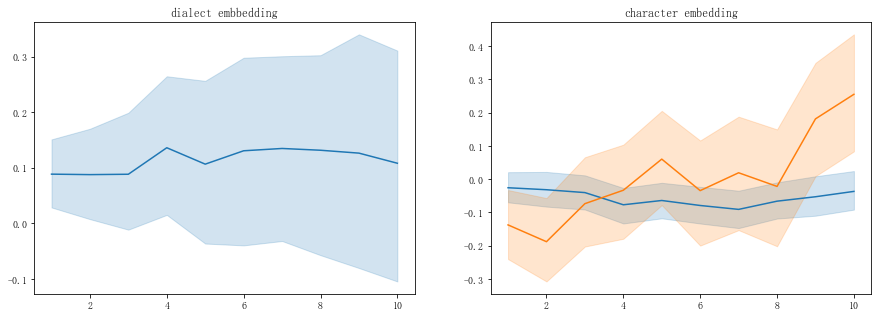

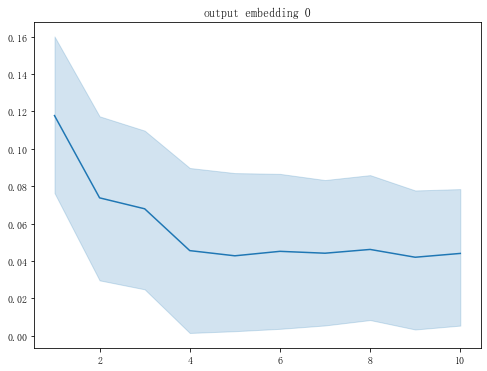

In [270]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

x = np.repeat(steps, dialect_embs.shape[1] * dialect_embs.shape[2])
y = dialect_embs.flatten()
if x.shape[0] > 10000:
    idx = np.random.choice(np.arange(x.shape[0]), 10000, replace=False)
    x = x[idx]
    y = y[idx]
    
sns.lineplot(x=x, y=y, ax=ax1)
ax1.set_title('dialect embbedding')

x  =np.repeat(steps, char_embs.shape[1] * char_embs.shape[2])
y = char_embs.flatten()
idx = np.random.choice(np.arange(x.shape[0]), 10000, replace=False)
sns.lineplot(x=x[idx], y=y[idx], ax=ax2)

x = np.repeat(steps, dest_embs.shape[1] * dest_embs.shape[2])
y = dest_embs.flatten()
idx = np.random.choice(np.arange(x.shape[0]), 10000, replace=False)
sns.lineplot(x=x[idx], y=y[idx], ax=ax2)
ax2.set_title('character embedding')

plt.show()

fig, axes = plt.subplots(len(output_embs), 1, squeeze=False)
fig.set_size_inches(8, 6 * len(output_embs))

for i, emb in enumerate(output_embs):
    x = np.repeat(steps, emb.shape[1] * emb.shape[2])
    y = emb.flatten()
    if x.shape[0] > 10000:
        idx = np.random.choice(np.arange(x.shape[0]), 10000, replace=False)
        x = x[idx]
        y = y[idx]
        
    sns.lineplot(x=x, y=y, ax=axes[i, 0])
    axes[i, 0].set_title('output embedding {}'.format(i))
    
plt.show()

In [271]:
dialect_emb = dp.dialect_emb.numpy()
char_emb = tf.clip_by_value(dp.char_emb, -1, 1).numpy()
char_pca = PCA(2)
char_pc = char_pca.fit_transform(char_emb)

initial_emb = dp.output_embs[0].numpy()
initial_pc = char_pca.transform(initial_emb)

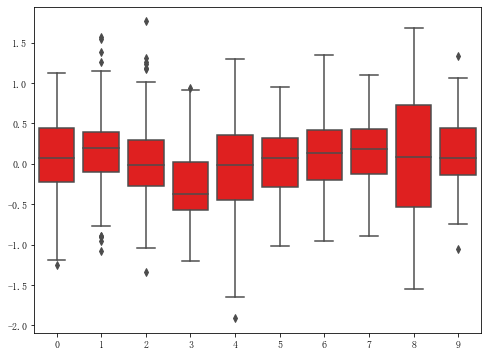

In [272]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=initial_emb, color='red')
plt.show()

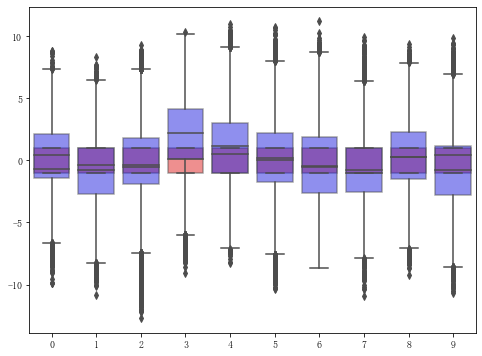

In [273]:
dest_emb = dp.transform(dp.get_dialect_emb(data['oid'].values), dp.get_char_emb(data['iid'].values))

plt.figure(figsize=(8, 6))
sns.boxplot(data=char_emb, color='red', boxprops={'alpha': 0.5})
sns.boxplot(data=dest_emb, color='blue', boxprops={'alpha': 0.5})
plt.show()

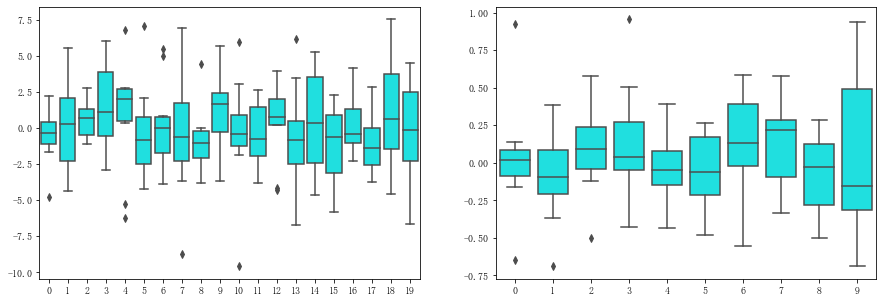

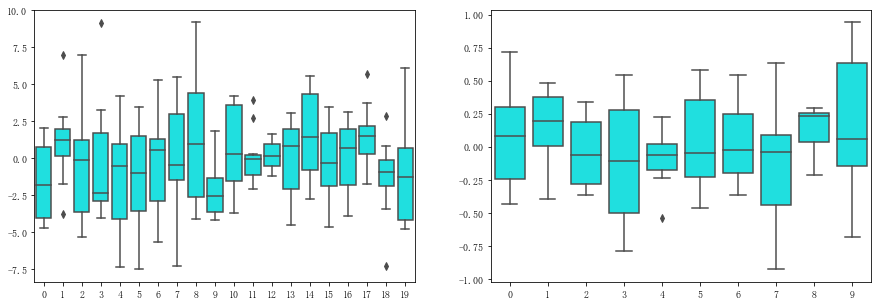

In [274]:
for w1, w2 in zip(dp.res_weights1, dp.res_weights2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(data=w1.numpy().T, color='cyan', ax=ax1)
    sns.boxplot(data=w2.numpy(), color='cyan', ax=ax2)
    plt.show()

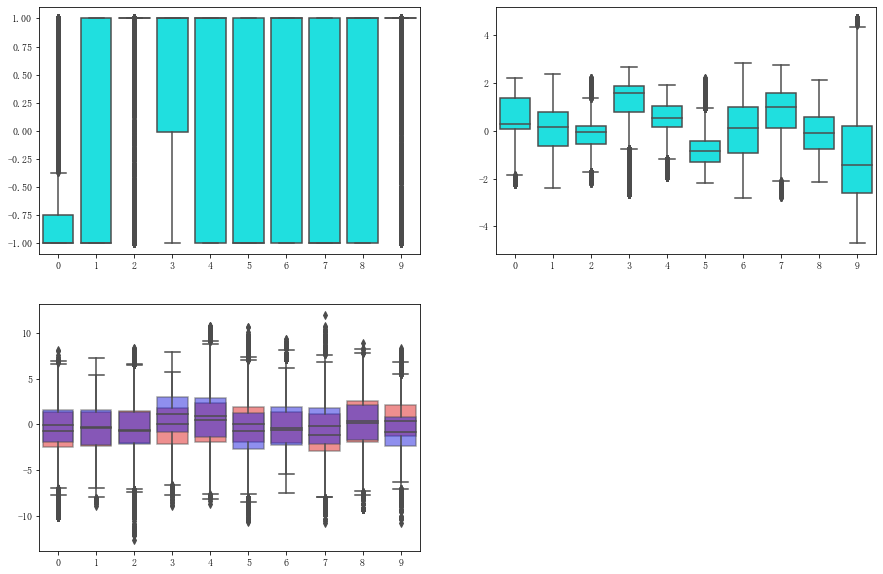

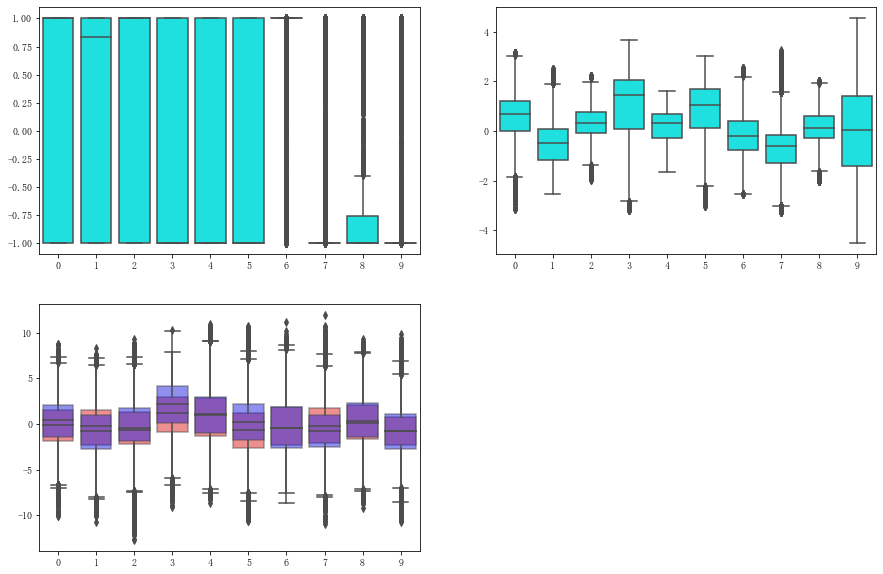

In [277]:
input_dialect_emb = dp.get_dialect_emb(data['oid'])
emb = dp.get_char_emb(data['iid'])
for w1, w2 in zip(dp.res_weights1, dp.res_weights2):
    act = dp.activation(tf.matmul(tf.concat([input_dialect_emb, emb], axis=1), w1))
    res = tf.matmul(act, w2)
    
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.boxplot(data=act.numpy(), color='cyan')
    plt.subplot(2, 2, 2)
    sns.boxplot(data=res.numpy(), color='cyan')
    plt.subplot(2, 2, 3)
    sns.boxplot(data=emb.numpy(), color='red', boxprops={'alpha': 0.5})
    emb += res
    sns.boxplot(data=emb.numpy(), color='blue', boxprops={'alpha': 0.5})
    plt.show()

Font 'rm' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u65e0' [U+65e0], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u8fd9' [U+8fd9], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u6837' [U+6837], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u8bfb' [U+8bfb], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u97f3' [U+97f3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u662f' [U+662f], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u5f88' [U+5f88], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u8001' [U+8001], substituting with a dummy symbol.
Font 'rm' does not ha

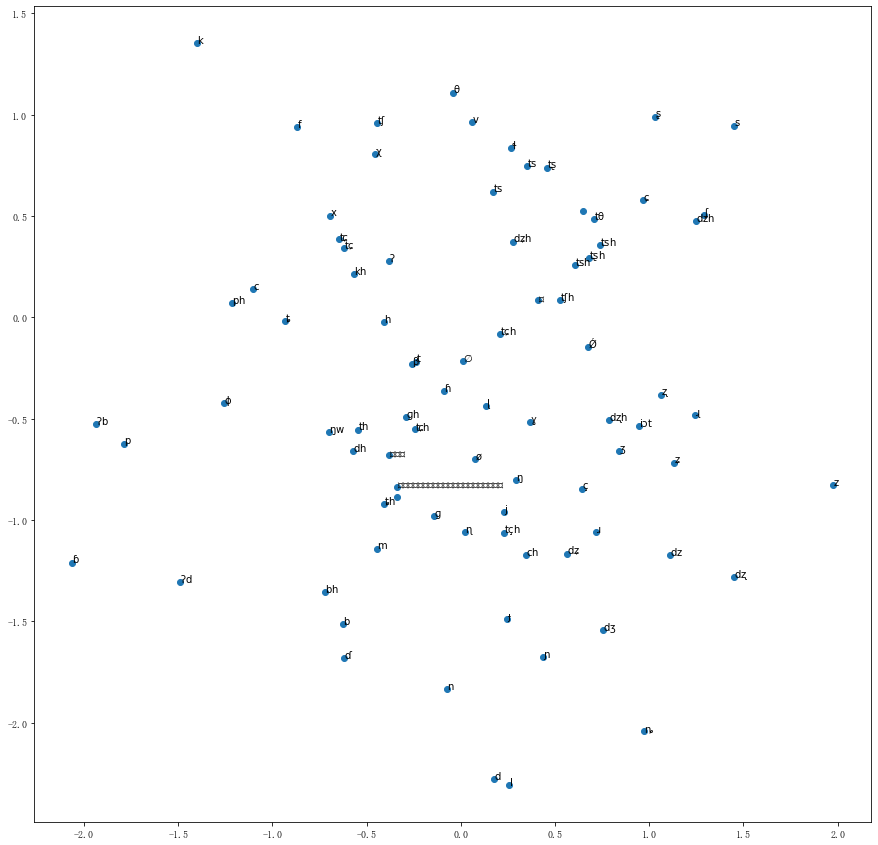

In [183]:
plt.figure(figsize=(15, 15))

if False:
    for initial in np.unique(preds[:, 0]):
        cooc = np.mean(sample_pc[preds[:, 0] == initial], axis=0)
        plt.scatter(cooc[None, 0], cooc[None, 1], color='red')
        plt.annotate(r'$\mathrm{{{}}}$'.format(initial), xy=(cooc[0], cooc[1]))
    
plt.scatter(initial_pc[:, 0], initial_pc[:, 1])
for i, initial in enumerate(np.char.decode(dp.outputs[0].numpy().astype(np.bytes_))):
    plt.annotate(r'$\mathrm{{{}}}$'.format(initial), xy=(initial_pc[i, 0], initial_pc[i, 1]))
    
plt.show()

In [276]:
dest_emb = dp.transform(
    tf.repeat(dp.dialect_emb[:2], char_emb.shape[0], axis=0),
    tf.tile(char_emb, [2, 1])
).numpy()

idx = np.random.choice(char_emb.shape[0] - 1, 20, replace=False)
char_ids = dp.id_to_char(idx).numpy().astype(np.bytes_).astype(int)
chars = char.loc[char_ids, 'item'].values
char_pc = char_pca.transform(char_emb[idx])
dest_pc = char_pca.transform(dest_emb).reshape([2, -1, 2])[:, idx]

plt.figure(figsize=(15, 15))

plt.scatter(initial_pc[:, 0], initial_pc[:, 1], alpha=0.5)
for i, initial in enumerate(np.char.decode(dp.outputs[0].numpy().astype(np.bytes_))):
    plt.annotate(r'$\mathrm{{{}}}$'.format(initial), xy=(initial_pc[i, 0], initial_pc[i, 1]), color='gray')
    
plt.scatter(char_pc[:, 0], char_pc[:, 1])
for i in range(char_pc.shape[0]):
    plt.annotate(chars[i], xy=(char_pc[i, 0], char_pc[i, 1]))

for i in range(dest_pc.shape[0]):
    plt.scatter(dest_pc[i, :, 0], dest_pc[i, :, 1])
    
    for j in range(char_pc.shape[0]):
        plt.arrow(char_pc[j, 0], char_pc[j, 1], dest_pc[i, j, 0] - char_pc[j, 0], dest_pc[i, j, 1] - char_pc[j, 1], alpha=0.5)
        
plt.show()

InvalidArgumentError: indices[0] = 24254 is not in [0, 1000) [Op:GatherV2]

In [58]:
test_dialects = ['05K02', '23C85']
test_chars = ['0469', '0474', '0656']
demb = dp.get_dialect_emb(test_dialects)
cemb = dp.get_char_emb(test_chars)
emb = dp.transform(tf.repeat(demb, cemb.shape[0], axis=0), tf.tile(cemb, [demb.shape[0], 1]))
dest_emb = emb[0::3] - emb[1::3] + emb[2::3]
pred = np.char.decode(tf.stack(
    [dp.id_to_target(i, tf.argmax(tf.matmul(dest_emb, e, transpose_b=True), axis=1)) for i, e in enumerate(dp.output_embs)]
    , axis=1
).numpy().astype(np.bytes_))
display(pred)

array([['k'],
       ['k']], dtype='<U1')

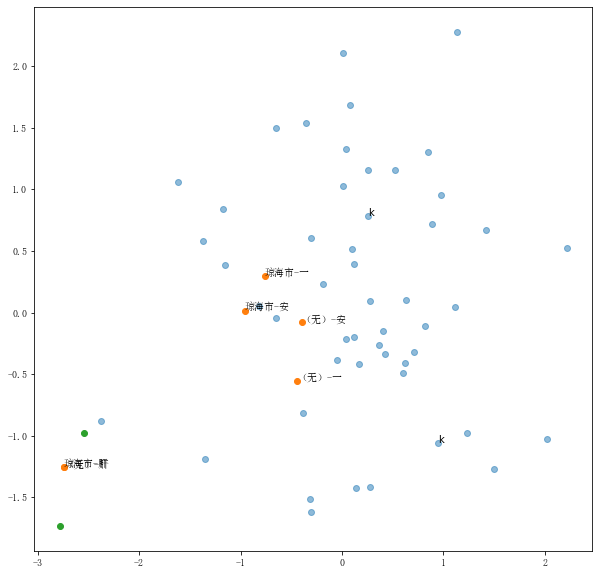

In [59]:
plt.figure(figsize=(10, 10))
plt.scatter(initial_pc[:, 0], initial_pc[:, 1], alpha=0.5)
src_pc = char_pca.transform(emb)
dest_pc = char_pca.transform(dest_emb)
plt.scatter(src_pc[:, 0], src_pc[:, 1])
plt.scatter(dest_pc[:, 0], dest_pc[:, 1])

for i in range(src_pc.shape[0]):
    plt.annotate(
        '{}-{}'.format(location.loc[test_dialects[i // 3], 'country'], char.loc[int(test_chars[i % 3]), 'item']),
        xy=(src_pc[i, 0], src_pc[i, 1])
    )
    
initial_id = dp.target_to_id(0, pred[:, 0]).numpy()
for i in range(initial_id.shape[0]):
    plt.annotate(r'$\mathrm{{{}}}$'.format(pred[i, 0]), xy=(initial_pc[i, 0], initial_pc[i, 1]))
    
plt.show()

In [60]:
demb = dp.get_dialect_emb(['05K02', '08K18'])
demb1 = demb[0]
demb2 = demb[1]
cemb = dp.get_char_emb(['0843'])[0]
w = np.arange(0, 1.1, 0.1)
demb = (1 - w[:, None]) * demb1[None, :] + w[:, None] * demb2[None, :]
emb = dp.transform(demb, tf.tile(cemb[None, :], [demb.shape[0], 1]))
pred = dp.predict_id_emb(demb, tf.tile(cemb[None, :], [demb.shape[0], 1]))
display(np.char.decode(tf.stack([dp.id_to_target(i, pred[:, i]) for i in range(pred.shape[1])], axis=1).numpy().astype(np.bytes_)))

array([['p'],
       ['p'],
       ['p'],
       ['p'],
       ['p'],
       ['p'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b']], dtype='<U1')

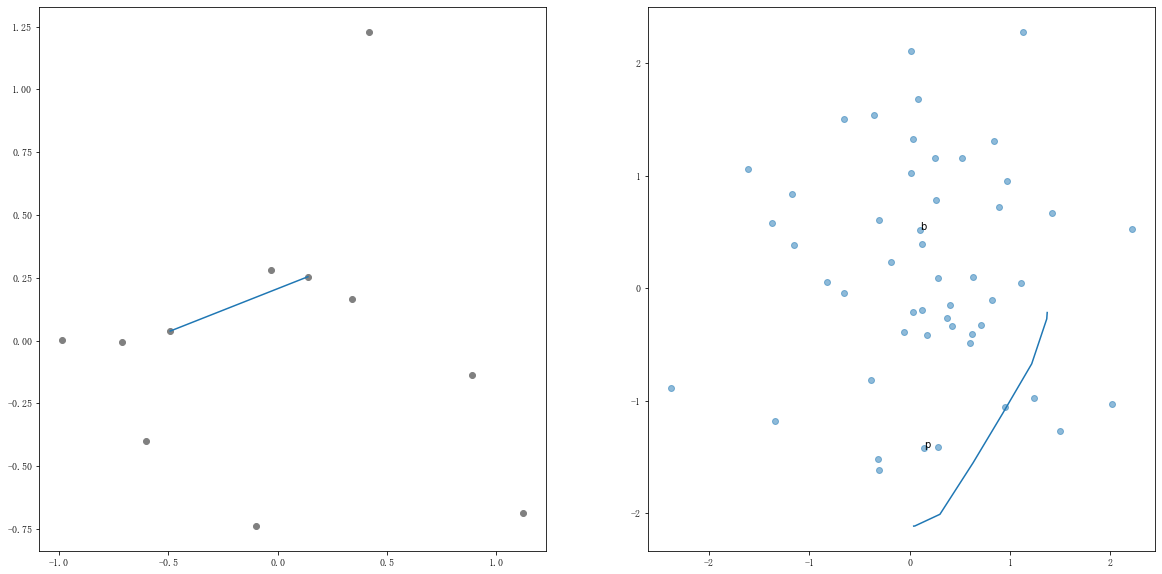

In [61]:
dialect_pca = PCA(2)
dialect_pc = dialect_pca.fit_transform(dialect_emb)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

ax1.scatter(dialect_pc[:, 0], dialect_pc[:, 1], color='gray')
src_pc = dialect_pca.transform(demb.numpy())
ax1.plot(src_pc[:, 0], src_pc[:, 1])

ax2.scatter(initial_pc[:, 0], initial_pc[:, 1], alpha=0.5)
dest_pc = char_pca.transform(emb)
ax2.plot(dest_pc[:, 0], dest_pc[:, 1])

ids = tf.unique(pred[:, 0])[0]
phones = np.char.decode(dp.id_to_target(0, ids).numpy().astype(np.bytes_))
for id, phone in zip(ids.numpy(), phones):
    ax2.annotate(r'$\mathrm{{{}}}$'.format(phone), xy=(initial_pc[id, 0], initial_pc[id, 1]))
    
plt.show()